In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv('Global_Superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [44]:
df.shape

(1000, 24)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

In [46]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,194.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,25079.328000,53966.170103,1710.971470,5.55800,0.092840,288.920440,272.384897
std,12897.726632,33734.306466,1259.239238,2.71846,0.148666,574.504782,176.160716
min,58.000000,2920.000000,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,15118.750000,19134.000000,826.907500,4.00000,0.000000,10.037500,209.827500
50%,25084.500000,60564.000000,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,34524.000000,88187.500000,2477.812500,7.00000,0.150000,518.872500,351.070250
max,51284.000000,98198.000000,9892.740000,14.00000,0.800000,4946.370000,923.630000


In [47]:
df.isnull().sum().sort_values(ascending=False).head()

Postal Code    806
Row ID           0
Order Date       0
Order ID         0
Ship Mode        0
dtype: int64

In [48]:
df = df.drop(['Postal Code'], axis=1)

In [49]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [50]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [51]:
df[df['Profit']<0].sort_values(by=['Profit'])

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
512,10458,IT-2014-SS20140104-41800,2014-06-10,2014-06-14,Standard Class,SS-20140104,Saphhira Shifley,Corporate,Lisbon,Lisboa,...,OFF-AP-4745,Office Supplies,Appliances,"Hoover Stove, White",3399.66,12,0.50,-3059.82,286.870,Medium
362,29513,ID-2014-SN2056097-41896,2014-09-14,2014-09-14,Same Day,SN-2056097,Skye Norling,Home Office,Lahore,Punjab,...,TEC-PH-3148,Technology,Phones,"Apple Smart Phone, Full Size",3499.16,11,0.50,-3009.44,333.100,Medium
245,46219,LH-2015-JC610575-42032,2015-01-28,2015-01-30,Second Class,JC-610575,Julie Creighton,Corporate,Vilnius,Vilnius,...,FUR-TA-3345,Furniture,Tables,"Barricks Conference Table, Rectangular",2171.16,8,0.70,-2750.28,390.090,High
109,11743,IT-2014-VM2168591-41711,2014-03-13,2014-03-13,Same Day,VM-2168591,Valerie Mitchum,Home Office,Bergen op Zoom,North Brabant,...,FUR-CH-5442,Furniture,Chairs,"Office Star Executive Leather Armchair, Black",2570.87,11,0.50,-2211.17,520.890,High
643,10274,US-2013-CL1189018-41459,2013-07-04,2013-07-04,Same Day,CL-1189018,Carl Ludwig,Consumer,Açu,Rio Grande do Norte,...,TEC-PH-5839,Technology,Phones,"Samsung Smart Phone, Cordless",1363.20,8,0.60,-1806.24,255.173,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,15896,IT-2013-PM1894045-41546,2013-09-29,2013-09-29,Same Day,PM-1894045,Paul MacIntyre,Consumer,Boulogne-Billancourt,Ile-de-France,...,TEC-MA-5572,Technology,Machines,"Panasonic Printer, Red",2016.85,9,0.15,-0.05,540.770,Critical
817,4820,MX-2012-AH1003082-41251,2012-12-08,2012-12-09,First Class,AH-1003082,Aaron Hawkins,Corporate,Saltillo,Coahuila,...,FUR-BO-4861,Furniture,Bookcases,"Ikea Library with Doors, Mobile",780.61,4,0.20,-0.03,226.629,High
451,3700,US-2013-SL2015582-41422,2013-05-28,2013-05-29,First Class,SL-2015582,Sara Luxemburg,Home Office,Coyoacán,Distrito Federal,...,FUR-BO-4861,Furniture,Bookcases,"Ikea Library with Doors, Mobile",585.46,3,0.20,-0.02,304.530,Critical
169,25915,ID-2015-AA10480130-42080,2015-03-17,2015-03-21,Standard Class,AA-10480130,Andrew Allen,Consumer,Bangkok,Bangkok,...,TEC-PH-5840,Technology,Phones,"Samsung Smart Phone, Full Size",2645.38,5,0.17,-0.02,452.600,High


In [52]:
total_sales = df['Sales'].sum()
print(f'Total Sales: ${total_sales}')

Total Sales: $1710971.47


In [53]:
total_profit = round(df['Profit'].sum(),2)
print(f'Total Profit: ${total_profit}')

Total Profit: $288920.44


In [54]:
categories=df['Category'].value_counts().reset_index()
categories

,Category,count
0,Technology,395
1,Furniture,326
2,Office Supplies,279


In [55]:
category_and_subcategory = df.groupby('Category')[['Sub-Category']].value_counts().reset_index()
category_and_subcategory= category_and_subcategory.sort_values(by='count',ascending=False)
category_and_subcategory

,Category,Sub-Category,count
13,Technology,Phones,179
0,Furniture,Bookcases,130
14,Technology,Copiers,126
4,Office Supplies,Appliances,125
1,Furniture,Chairs,95
2,Furniture,Tables,87
15,Technology,Machines,52
5,Office Supplies,Storage,45
6,Office Supplies,Binders,38
16,Technology,Accessories,38


In [61]:
sales_by_region=df.groupby('Region')[['Sales']].sum().sort_values(by='Sales',ascending=False)
sales_by_region

,Sales
Region,
Western Europe,259576.28
Oceania,220809.08
Southern Asia,205466.26
Eastern Asia,193590.60
Southeastern Asia,147337.60
Central America,140966.21
Northern Europe,103888.63
Southern Europe,94441.11
South America,64550.54


In [57]:
top_selling_products_by_Sales = df[['Product Name','Sales']].sort_values(by='Sales',ascending=False).head(20)
top_selling_products_by_Sales

,Product Name,Sales
419,GBC Ibimaster 500 Manual ProClick Binding System,9892.74
17,"Hoover Stove, Red",7958.58
215,"Samsung Smart Phone, VoIP",6998.64
641,"Motorola Smart Phone, Full Size",6439.80
43,"Motorola Smart Phone, Cordless",5785.02
313,"Apple Smart Phone, with Caller ID",5751.54
609,"Apple Smart Phone, Full Size",5737.50
80,"Hon Executive Leather Armchair, Adjustable",5729.35
461,"Nokia Smart Phone, Cordless",5725.35
42,"Sauder Classic Bookcase, Traditional",5667.87


In [17]:
top_selling_products_by_quantity = df[['Product Name','Quantity']].sort_values(by='Quantity',ascending=False).head(20)
top_selling_products_by_quantity

,Product Name,Quantity
355,"Hewlett Copy Machine, Color",14
334,"Sauder Classic Bookcase, Metal",14
396,"Rogers Shelving, Wire Frame",14
289,"Samsung Audio Dock, with Caller ID",14
140,"Memorex Router, Bluetooth",14
576,"Hamilton Beach Microwave, Red",14
840,"Breville Microwave, Silver",14
384,"Rogers Lockers, Blue",14
728,"Motorola Signal Booster, Full Size",14
983,"Tenex Trays, Industrial",14


In [72]:
df[['Region','Country']].groupby('Region').value_counts()


Region          Country           
Canada          Canada                 6
Caribbean       Dominican Republic     9
                Cuba                   8
                Jamaica                1
                Martinique             1
                                      ..
Western Europe  Austria                6
                Netherlands            4
                Belgium                3
                Switzerland            3
Western US      United States         62
Name: count, Length: 96, dtype: int64

In [18]:
df['Region'].value_counts()

Region
Western Europe       131
Oceania              100
Eastern Asia          90
Southern Asia         87
Central America       77
Southeastern Asia     70
Western US            62
Eastern US            60
Northern Europe       48
Central US            46
Southern Europe       46
South America         37
Southern US           26
Eastern Europe        23
Caribbean             19
Western Asia          18
Central Africa        14
North Africa          12
Southern Africa       11
Eastern Africa         9
Western Africa         8
Canada                 6
Name: count, dtype: int64

In [19]:
df.groupby('State')['City'].value_counts().reset_index().sort_values(by='count',ascending=False)

,State,City,count
371,New York,New York City,25
90,California,Los Angeles,11
91,California,San Francisco,10
446,Queensland,Gold Coast,10
142,England,London,10
...,...,...,...
13,Analamanga,Antananarivo,1
14,Andalusía,Seville,1
15,Andhra Pradesh,Vijayawada,1
16,Andhra Pradesh,Visakhapatnam,1


In [20]:
sales_count_by_region = df.groupby(['State','City'])['Sales'].size().sort_values(ascending=False)
sales_count_by_region

State            City         
New York         New York City    25
California       Los Angeles      11
                 San Francisco    10
Queensland       Gold Coast       10
England          London           10
                                  ..
Al Iskandariyah  Alexandria        1
Al Qadisiyah     Ad Diwaniyah      1
Al Qahirah       Cairo             1
Alberta          Edmonton          1
Alger            Algiers           1
Name: Sales, Length: 605, dtype: int64

In [21]:
sales_sum_by_region = df.groupby(['State','City'])['Sales'].sum().sort_values(ascending=False)
sales_sum_by_region

State            City            
New South Wales  Sydney              24379.11
Queensland       Brisbane            22827.30
                 Gold Coast          21518.13
Bangkok          Bangkok             21189.41
England          London              19253.76
                                       ...   
California       San Diego              13.97
Georgia          Atlanta                12.84
California       Huntington Beach        5.22
Washington       Auburn                  4.18
Ohio             Columbus                3.01
Name: Sales, Length: 605, dtype: float64

In [22]:
df['Profit Margin']=df['Profit']/df['Sales']

In [23]:
sub_category_profit_margin = df.groupby('Sub-Category')['Profit Margin'].mean().reset_index().sort_values(by='Profit Margin',ascending=False)
sub_category_profit_margin

,Sub-Category,Profit Margin
8,Fasteners,0.450010
12,Paper,0.427254
7,Envelopes,0.403993
10,Labels,0.402095
2,Art,0.237089
6,Copiers,0.231945
0,Accessories,0.222548
4,Bookcases,0.182304
13,Phones,0.149878
1,Appliances,0.139953


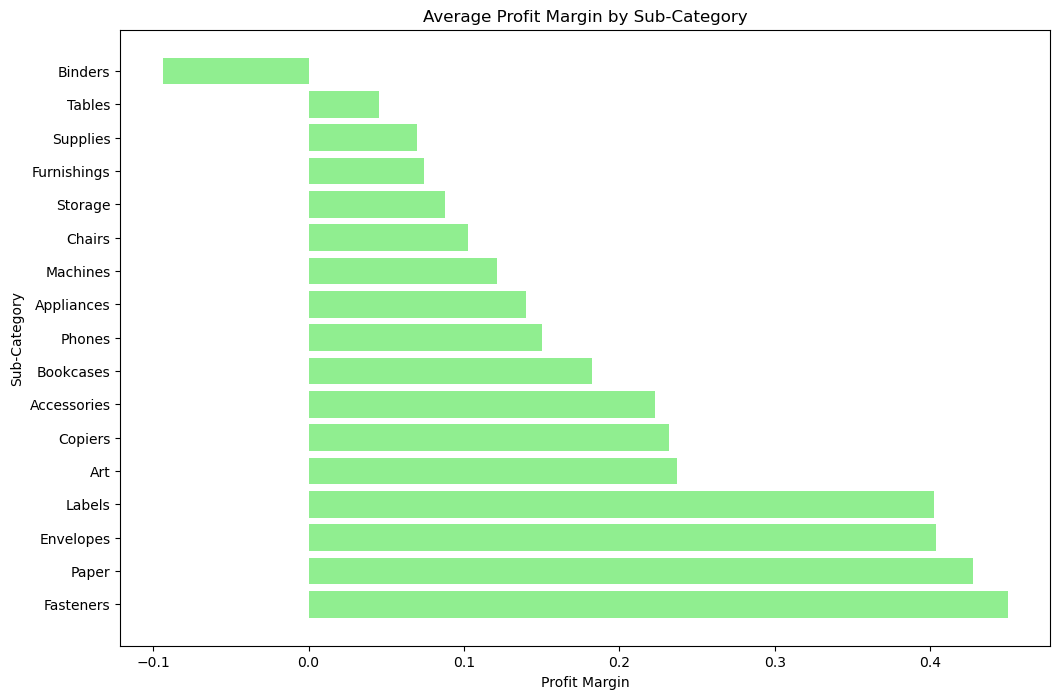

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
# Write your code here
ax.barh(sub_category_profit_margin['Sub-Category'],sub_category_profit_margin['Profit Margin'],color='lightgreen')
ax.set_title('Average Profit Margin by Sub-Category')
ax.set_xlabel('Profit Margin')
ax.set_ylabel('Sub-Category')
plt.show()

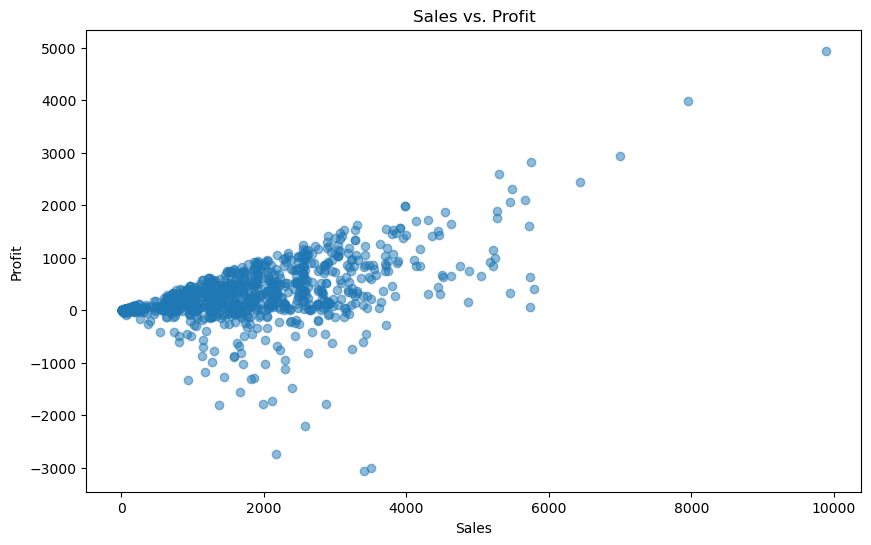

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

# Write your code here
ax.scatter(df['Sales'], df['Profit'], alpha=0.5)
ax.set_title('Sales vs. Profit')
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

In [26]:
correlation = round(df['Sales'].corr(df['Profit']),2)
print(correlation)

0.53


In [27]:
#Create a bar chart of sales by product category

sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,601492.31
1,Office Supplies,352496.14
2,Technology,756983.02


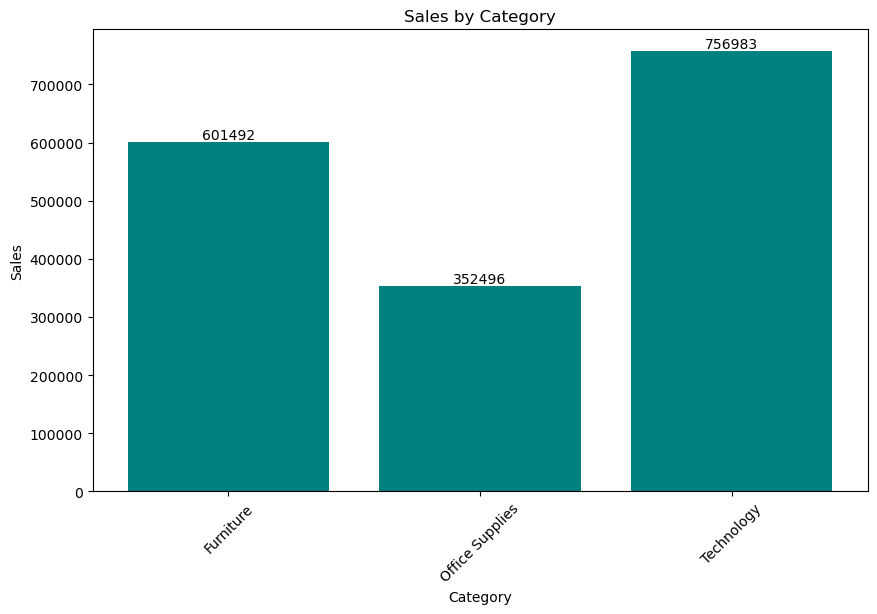

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

# Write your code here
ax.bar(sales_by_category['Category'], sales_by_category['Sales'],color='teal')
ax.set_title('Sales by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Sales')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

In [74]:

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Month-Year'] = df['Order Date'].dt.to_period('M')


In [75]:
#  Plot a line graph of monthly sales over time

monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()


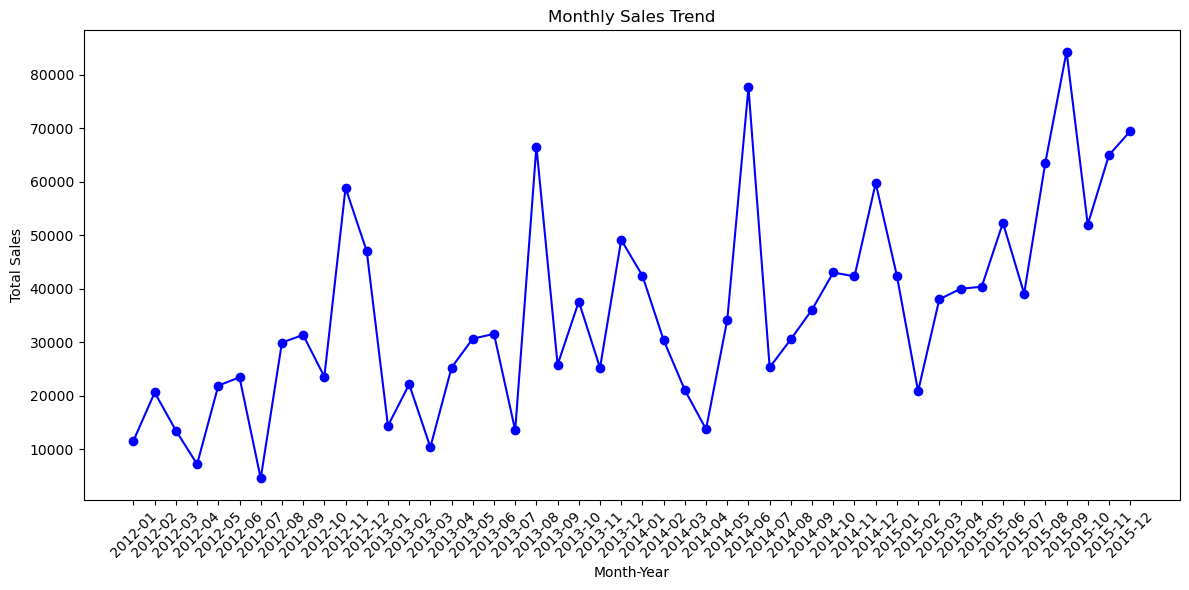

In [76]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_sales['Month-Year'].astype('str'), monthly_sales['Sales'], marker='o', color='b')
ax.set_title('Monthly Sales Trend')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

In [32]:
#produce a heatmap of sales by region and product category

sales_by_region_and_category = df.groupby(['Region','Category'])['Sales'].sum().sort_values(ascending=False).unstack()
sales_by_region_and_category

Category,Furniture,Office Supplies,Technology
Region,,,
Canada,NaN,887.01,NaN
Caribbean,12935.22,7971.20,9840.32
Central Africa,13578.48,3129.48,17102.52
Central America,43213.84,25707.02,72045.35
Central US,2085.15,12231.04,2871.75
Eastern Africa,3989.16,4819.98,8578.80
Eastern Asia,76786.81,29599.25,87204.54
Eastern Europe,20589.99,8371.44,16700.76
Eastern US,3258.53,7326.56,1671.35


<Axes: xlabel='Category', ylabel='Region'>

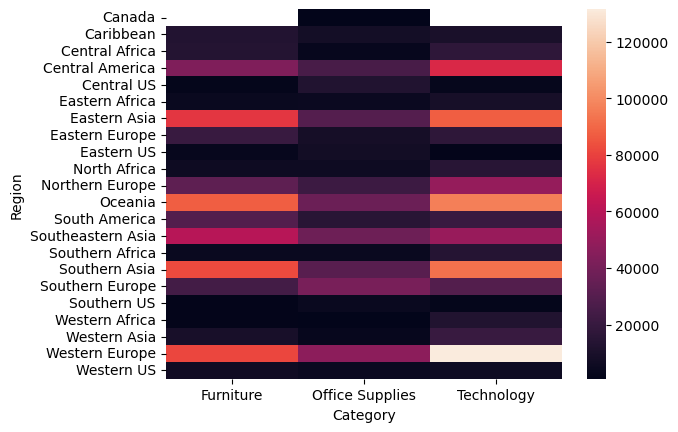

In [33]:
sns.heatmap(sales_by_region_and_category)

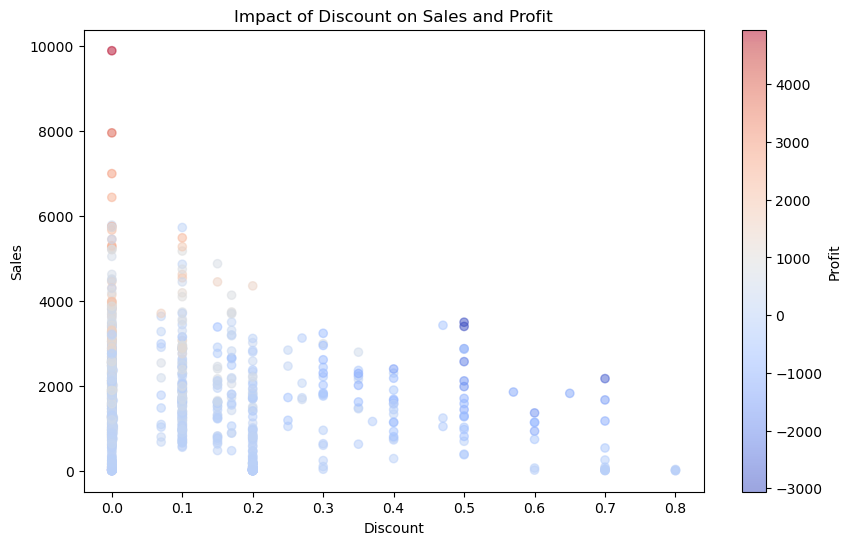

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
# Create a scatter plot with 'Discount' on the x-axis, 
# 'Sales' on the y-axis, and 
# 'Profit' as the color of the points using the 'coolwarm' colormap
sc = ax.scatter(df['Discount'],df['Sales'], c=df['Profit'], cmap='coolwarm', alpha=0.5)
ax.set_title('Impact of Discount on Sales and Profit')
ax.set_xlabel('Discount')
ax.set_ylabel('Sales')
# Add a colorbar to the plot
cbar = fig.colorbar(sc)
# Set the label for the colorbar
cbar.set_label('Profit')

Text(0, 0.5, 'Profit')

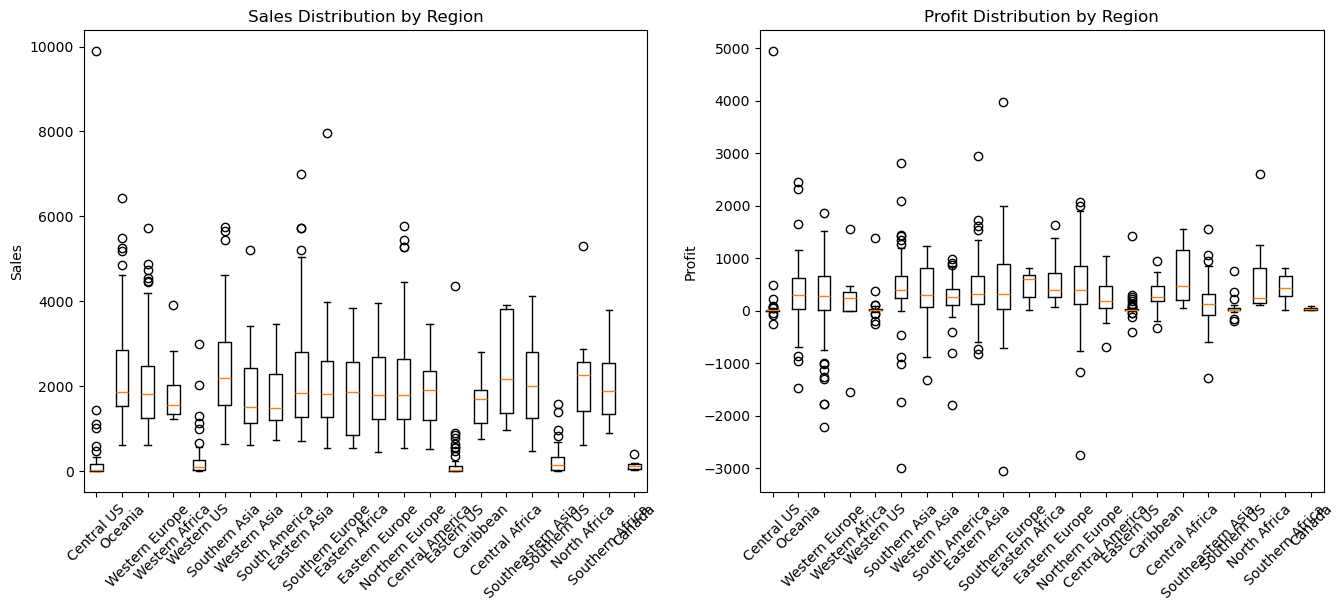

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Sales by Region
axs[0].boxplot([df.loc[df['Region'] == region, 'Sales'] for region in df['Region'].unique()])
axs[0].set_xticklabels(df['Region'].unique(), rotation=45)
axs[0].set_title('Sales Distribution by Region')
axs[0].set_ylabel('Sales')

# Profit by Region
axs[1].boxplot([df.loc[df['Region'] == region, 'Profit'] for region in df['Region'].unique()])
axs[1].set_xticklabels(df['Region'].unique(), rotation=45)
axs[1].set_title('Profit Distribution by Region')
axs[1].set_ylabel('Profit')
